# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [20]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# Create two new dataframes
north_df= pd.read_csv('NorthCallCenter.csv')
south_df= pd.read_csv('SouthCallCenter.csv')
north_df.info()
north_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:

north_df['Rep ID'].unique()


array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
#Code Used:
south_df['Rep ID'].unique()

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [94]:
north_df.groupby("Time Block")["Calls"].count()+south_df.groupby("Time Block")["Calls"].count()

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: North branch : Incoming wait time is null for 163
               South branch : Incoming wait time is null for 188
               Replacing with mean value is the appropriate approach for dealing with the missing value. 
               

In [95]:
# Code Used
# Add Additional Cells as needed.
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [100]:
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(north_df['Incoming Wait Time'].mean())
north_df['Incoming Wait Time']

0      1.00000
1      1.00000
2      1.00000
3      1.00000
4      1.00000
        ...   
240    3.04878
241    3.04878
242    3.04878
243    3.04878
244    3.04878
Name: Incoming Wait Time, Length: 245, dtype: float64

In [97]:
north_df.isnull().sum().sum()

0

In [98]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [ ]:
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(south_df['Incoming Wait Time'].mean())

In [101]:
south_df.isnull().sum().sum()

188

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [ ]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in the two datasets. df_north.drop_duplicates() would drop any duplicates in north dataset.

In [106]:
north_df.duplicated().sum()

0

In [107]:
south_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I think the Sale column is unnecessary and dropping it would be best way to handle it.

In [108]:
#Code Used
# Add Additional Cells as needed.

north_df.drop(columns=['Sale'])

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.00000,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.00000,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.00000,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.00000,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.00000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,0,0,10,2,3.04878,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,0,0,8,3,3.04878,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,0,0,12,1,3.04878,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,0,0,11,2,3.04878,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [109]:
# Create dataframe for the entire company name
df = pd.concat([north_df, south_df],ignore_index=True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric , 35 calls


In [110]:
# Code Used
# Add Additional Cells as needed.
north_df.groupby('Rep ID').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Amanda,2666,0,1,229,43,66.878049,60,23
Andy,2494,0,3,228,43,75.634146,65,23
Brent,4840,0,1,362,71,105.414634,117,37
Cam,2746,1,0,233,46,71.634146,66,24
Duke,2999,2,0,292,56,84.731707,85,29
Joe,3178,0,0,256,49,84.780488,81,26
Lilly,3375,0,2,307,59,91.878049,88,30
Todd,4252,1,0,296,58,91.121951,97,29
Xander,3340,1,0,244,44,74.878049,68,24


In [111]:
north_df.groupby('Rep ID').agg({'Calls': 'count'}).sort_values('Calls',ascending=False)

,Calls
Rep ID,
Brent,37
Lilly,30
Duke,29
Todd,29
Joe,26
Cam,24
Xander,24
Amanda,23
Andy,23


In [112]:
south_df.groupby('Rep ID').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Eric,5039,0,0,361,54,47.0,112,35
George,4620,0,0,298,53,41.0,87,29
Helga,5236,0,2,292,58,36.0,95,31
Josh,3960,3,0,260,50,31.0,83,26
Karl,4532,1,0,287,61,26.0,85,28
Kate,4615,0,0,291,61,37.0,83,29
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32


In [113]:
south_df.groupby('Rep ID').agg({'Calls': 'count'}).sort_values('Calls', ascending=False)

,Calls
Rep ID,
Eric,35
Randy,33
Sandy,32
Helga,31
George,29
Kate,29
Karl,28
Josh,26
Susan,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide =1.97%
- Do any of these fall out of the optimal range of 2-5%?
South Branch and company wide fall out of the optimal range of 2-5%

In [114]:
# Code Used
# Add Additional Cells as needed.
north=north_df['Abandoned'].mean()*100
north

2.857142857142857

In [115]:
south=south_df['Abandoned'].mean()*100
south

1.2738853503184715

In [116]:
company=df['Abandoned'].mean()*100
company

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 38.09%
- Company Wide = 39.94%

In [117]:
# Code Used
# Add Additional Cells as needed.
call_ans_north = (north_df["Incoming Wait Time"] <= 2.0).sum()
total_calls_north = (north_df[ 'Incoming or Outgoing']=='Incoming').sum()
perc_call_ans_north = call_ans_north/total_calls_north*100
perc_call_ans_north

40.243902439024396

In [118]:
call_ans_south = (south_df["Incoming Wait Time"] <= 2.0).sum()
total_calls_south= (south_df[ 'Incoming or Outgoing']=='Incoming').sum()
perc_call_ans_south  = call_ans_south/total_calls_south*100
perc_call_ans_south 

38.095238095238095

In [119]:
call_ans_company = (df["Incoming Wait Time"] <= 2.0).sum()
total_calls_company = (df[ 'Incoming or Outgoing']=='Incoming').sum()
perc_call_ans_company = call_ans_company/total_calls_company*100
perc_call_ans_company

38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [120]:
avg_speed_north_branch=north_df["Incoming Wait Time"].mean()
avg_speed_north_branch

3.0487804878048683

In [121]:
avg_speed_south_branch=south_df["Incoming Wait Time"].mean()
avg_speed_south_branch


3.0

In [122]:
avg_speed_company_wide = df["Incoming Wait Time"].mean()
avg_speed_company_wide

3.0322135296824606

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?A= 0.042, B=0.020, C=0.007, D=0.017
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar chart because it shows comparisons between two discrete categories.   X axis shows the queues being compared, and the Y axis represents a measured abandonment rates. 

In [123]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}

queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    print(abandonment_rates[queues[i]])
#Your Code Here:



  

0.041666666666666664
0.020134228187919462
0.007246376811594203
0.017045454545454544


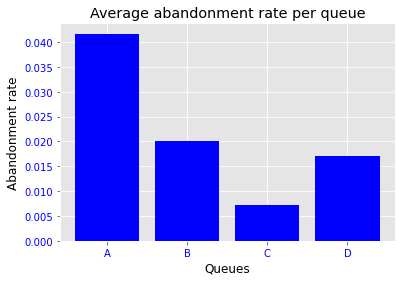

In [124]:
data=abandonment_rates
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=queues, color ='blue')
plt.title('Average abandonment rate per queue')
plt.xlabel('Queues', color = 'black')
plt.ylabel('Abandonment rate', color = 'black')
plt.xticks(color = 'blue')
plt.yticks(color = 'blue')
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar chart with two y axis. Because we are visualizing two  variables with different  scales of measurements against one variable. One y axis shows average speed of answer and other shows the service level percent for each representatives in the North Branch. 

In [125]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table



# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")


# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level["Service Level %"]

#Your Code Here:



Rep ID
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       20.000000
Lilly     33.333333
Todd      33.333333
Xander    33.333333
Name: Service Level %, dtype: float64

In [126]:
north_plt


,Rep ID,Incoming Wait Time
0,Amanda,2.907741
1,Andy,3.288441
2,Brent,2.849044
3,Cam,2.984756
4,Duke,2.921783
5,Joe,3.260788
6,Lilly,3.062602
7,Todd,3.142136
8,Xander,3.119919


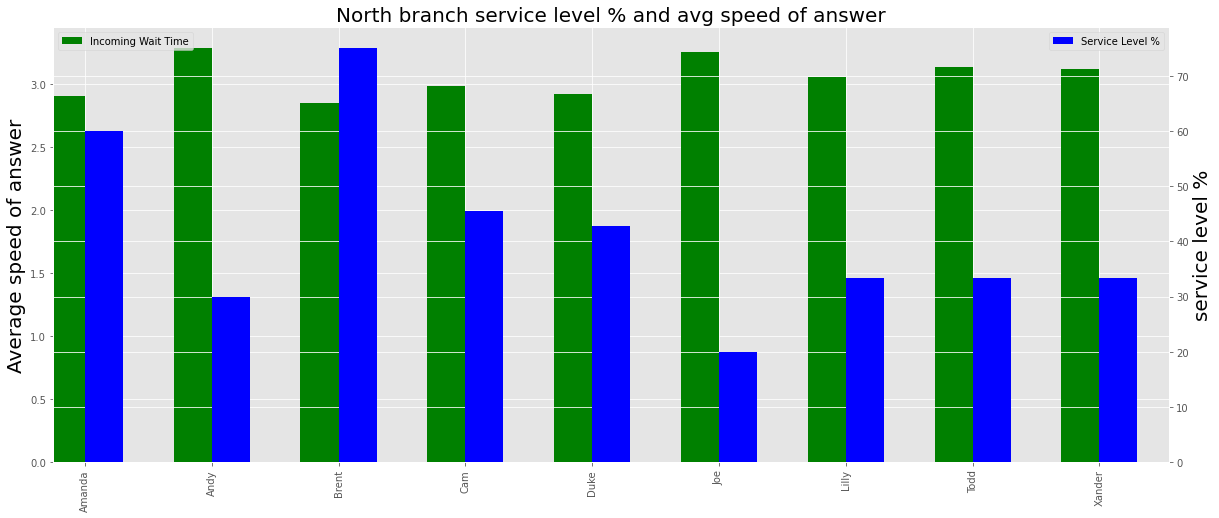

In [127]:
fig = plt.figure()

ax = fig.add_subplot() 
ax2 = ax.twinx() 

width = 0.3

north_plt.plot(kind='bar', color='green', ax=ax, width=width, position=1,figsize=(20,8))
service_level["Service Level %"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Average speed of answer', color = 'black',fontsize=20 )
ax2.set_ylabel('service level %', color ='black',fontsize=20)
ax.legend(loc='upper left')
ax2.legend(loc = 'upper right')
plt.title('North branch service level % and avg speed of answer',color = 'black',fontsize=20)

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why:  I chose grouped bar chart to  compare  two categorical variables within each group. Here we are comparing both incoming and outgoing calls within each call purpose group.

In [128]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


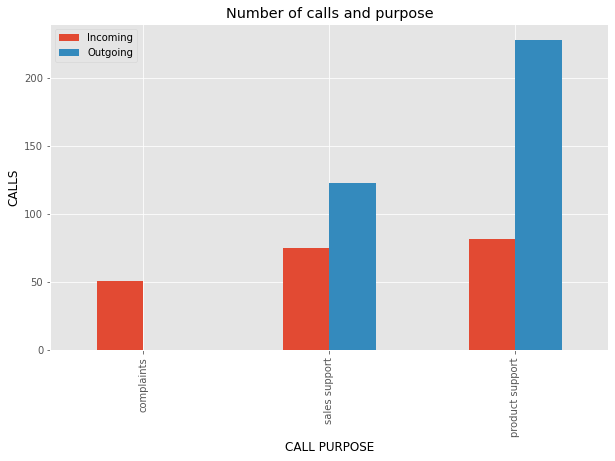

In [129]:
Incoming = {
    'complaints':51,
    'sales support':75,
    'product support':82
    
}
Outgoing = {
    'complaints':0,
    'sales support':123,
    'product support':228
    
}



data1 = pd.DataFrame([Incoming, Outgoing], index=['Incoming','Outgoing']).transpose()

fig, ax= plt.subplots(1,1, figsize=(10,6))

data1.plot.bar(ax=ax)
plt.xlabel('CALL PURPOSE', color = 'black')
plt.ylabel('CALLS', color = 'black')
plt.title('Number of calls and purpose')

plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Since south branch abandonment rate is lower and average speed of answer is higher it is operating efficiently. 

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
Since north branch has less number of reps adding more reps woulb be beneficial for north branch

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose multiple line chart to show number of calls for each of the call purpose in each time block.It is easy to visualize the trend of3 different calls purpose over time .

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]


# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

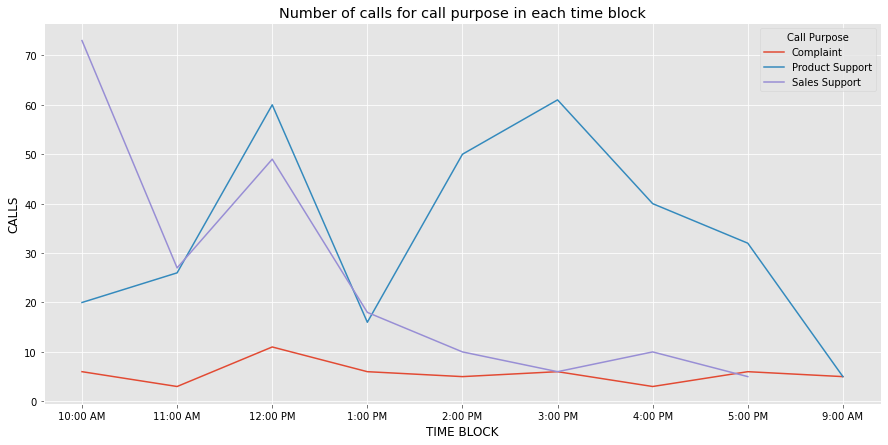

In [58]:

fig, ax = plt.subplots(figsize=(15,7))

df.groupby(["Time Block",'Call Purpose'])["Calls"].sum().unstack().plot(ax=ax)
plt.title('Number of calls for call purpose in each time block', color='black')
plt.xlabel('TIME BLOCK', color = 'black')
plt.ylabel('CALLS', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()